stackingのアンサンブル用シート

In [1]:
import pandas as pd


df_adachi = pd.read_csv('../data/handmade_data/block_aveprice_adachi2019.csv')
df_arakawa = pd.read_csv('../data/handmade_data/block_aveprice_arakawa2019.csv')
df_bunkyo = pd.read_csv('../data/handmade_data/block_aveprice_bunkyo2019.csv')
df_chiyoda = pd.read_csv('../data/handmade_data/block_aveprice_chiyoda2019.csv')
df_chuo = pd.read_csv('../data/handmade_data/block_aveprice_chuo2019.csv')
df_edogawa = pd.read_csv('../data/handmade_data/block_aveprice_edogawa2019.csv')
df_itabashi = pd.read_csv('../data/handmade_data/block_aveprice_itabashi2019.csv')
df_katsushika = pd.read_csv('../data/handmade_data/block_aveprice_katsushika2019.csv')
df_kita = pd.read_csv('../data/handmade_data/block_aveprice_kita2019.csv')
df_koto = pd.read_csv('../data/handmade_data/block_aveprice_koto2019.csv')
df_meguro = pd.read_csv('../data/handmade_data/block_aveprice_meguro2019.csv')
df_minato = pd.read_csv('../data/handmade_data/block_aveprice_minato2019.csv')
df_nakano = pd.read_csv('../data/handmade_data/block_aveprice_nakano2019.csv')
df_nerima = pd.read_csv('../data/handmade_data/block_aveprice_nerima2019.csv')
df_ota = pd.read_csv('../data/handmade_data/block_aveprice_ota2019.csv')
df_setagaya = pd.read_csv('../data/handmade_data/block_aveprice_setagaya2019.csv')
df_shibuya = pd.read_csv('../data/handmade_data/block_aveprice_shibuya2019.csv')
df_shinagawa = pd.read_csv('../data/handmade_data/block_aveprice_shinagawa2019.csv')
df_shinjuku = pd.read_csv('../data/handmade_data/block_aveprice_shinjuku2019.csv')
df_suginami = pd.read_csv('../data/handmade_data/block_aveprice_suginami2019.csv')
df_sumida = pd.read_csv('../data/handmade_data/block_aveprice_sumida2019.csv')
df_taito = pd.read_csv('../data/handmade_data/block_aveprice_taito2019.csv')
df_toshima = pd.read_csv('../data/handmade_data/block_aveprice_toshima2019.csv')

df_23wards = pd.concat([
    df_adachi,
    df_arakawa,
    df_bunkyo,
    df_chiyoda,
    df_chuo,
    df_edogawa,
    df_itabashi,
    df_katsushika,
    df_kita,
    df_koto,
    df_meguro,
    df_minato,
    df_nakano,
    df_nerima,
    df_ota,
    df_setagaya,
    df_shibuya,
    df_shinjuku,
    df_shinagawa,
    df_suginami,
    df_sumida,
    df_taito,
    df_toshima
],ignore_index=True)

addresses = pd.read_csv('../data/handmade_data/merge_address.csv')
addresses = addresses['所在地']
addresses = pd.DataFrame(addresses)

address_aveprice = pd.merge(addresses, df_23wards, left_on='所在地', right_on='0', how='left')
address_aveprice = address_aveprice[['所在地', '1']]
address_aveprice.columns = [['区町名', '平均地価']]

land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
land_aveprice.columns = ['平均地価']
test_land_aveprice.columns = ['平均地価']


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]]], axis=1)
y_train = rent
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D","S"]]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','S']

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


lightGBMとDARTとGOSSとXGBoostでstackingアンサンブルを行う。

In [2]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
sX_train, sX_valid, sy_train, sy_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [3]:
####LisgtGBM###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_LGBM = {
    'objective':'regression',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.430375245218262e-06,
    'max_bin': 502,
    'num_leaves': 97
}
model_LGBM = lgb.train(
                    params_LGBM,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=3000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###DART###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_DART = {
    'objective':'regression',
    'boosting_type':'dart',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 2.1600820741402023e-05,
    'max_bin': 556,
    'num_leaves': 126
}

model_DART = lgb.train(
                    params_DART,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###GOSS###
lgb_train = lgb.Dataset(sX_train, sy_train)
lgb_eval = lgb.Dataset(sX_valid, sy_valid, reference=lgb_train)
params_GOSS = {
    'objective':'regression',
    'boosting_type':'goss',
    'metrics':'rmse',
    'learning_rate':0.05,
    'reg_lambda': 4.669226029558975e-07,
    'max_bin': 584,
    'num_leaves': 85
}

model_GOSS = lgb.train(
                    params_GOSS,
                    lgb_train, 
                    valid_sets=[lgb_train, lgb_eval], 
                    verbose_eval=10, 
                    num_boost_round=1000, 
                    early_stopping_rounds=10,
                    categorical_feature = category_lists
                    )

###XGBoost###
xgb_reg = xgboost.XGBRegressor(
    #目的関数の指定 初期値も二乗誤差です
                    objective='reg:linear',
                    #学習のラウンド数 early_stoppingを利用するので多めに指定
                    n_estimators=50000,
                    #boosterに何を用いるか 初期値もgbtreeです
                    booster='gbtree',
                    learning_rate=0.05,
                    max_depth=7,
                    random_state=0,
                    reg_alfa=2.054762512591133e-06,
                    sub_sample=0.5530198332197337,
                    colsample_bytree=0.7642417009494488,
                    min_child_weight=0.14135935551752302
)
xgb_reg.fit(sX_train, sy_train, eval_set=[(sX_valid, sy_valid)], early_stopping_rounds=10)

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'K', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' ar

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118575.175126
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 50511.5	valid_1's rmse: 47173.3
[20]	training's rmse: 36554.8	valid_1's rmse: 34357.2
[30]	training's rmse: 27718.5	valid_1's rmse: 27678.9
[40]	training's rmse: 21895.7	valid_1's rmse: 23455.8
[50]	training's rmse: 18480.9	valid_1's rmse: 21216
[60]	training's rmse: 16201.8	valid_1's rmse: 19959.1
[70]	training's rmse: 14759.3	valid_1's rmse: 19144.7
[80]	training's rmse: 13748	valid_1's rmse: 18632.3
[90]	training's rmse: 13001.9	valid_1's rmse: 18250.1
[100]	training's rmse: 12406.5	valid_1's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[20]	training's rmse: 39060.6	valid_1's rmse: 38386.1
[30]	training's rmse: 31370.9	valid_1's rmse: 32300.4
[40]	training's rmse: 28097.6	valid_1's rmse: 30064.5
[50]	training's rmse: 31488.4	valid_1's rmse: 33271.2
[60]	training's rmse: 35739.4	valid_1's rmse: 37504.2
[70]	training's rmse: 37646.7	valid_1's rmse: 39294.6
[80]	training's rmse: 32693.3	valid_1's rmse: 34700.5
[90]	training's rmse: 32554.9	valid_1's rmse: 34409.7
[100]	training's rmse: 34533.3	valid_1's rmse: 36461.8
[110]	training's rmse: 41327.6	valid_1's rmse: 42712
[120]	training's rmse: 33168.8	valid_1's rmse: 35604.5
[130]	training's rmse: 30080.5	valid_1's rmse: 32858.9
[140]	training's rmse: 32758.2	valid_1's rmse: 35347.7
[150]	training's rmse: 31275.1	valid_1's rmse: 33906.6
[160]	training's rmse: 35974.8	valid_1's rmse: 38104.3
[170]	training's rmse: 29090.7	valid_1's rmse: 32068.1
[180]	training's rmse: 27767.1	valid_1's rmse: 31113.5
[190]	training's rmse: 23772.2	valid_1's rmse: 27726.5
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:68785.59039
[16]	validation_0-rmse:66023.10751
[17]	validation_0-rmse:63305.05193
[18]	validation_0-rmse:60876.61611
[19]	validation_0-rmse:58440.02378
[20]	validation_0-rmse:56526.74184
[21]	validation_0-rmse:54541.82777
[22]	validation_0-rmse:52925.30037
[23]	validation_0-rmse:51141.56174
[24]	validation_0-rmse:49636.51780
[25]	validation_0-rmse:48034.42951
[26]	validation_0-rmse:46578.44929
[27]	validation_0-rmse:45363.79701
[28]	validation_0-rmse:44017.63525
[29]	validation_0-rmse:42952.96790
[30]	validation_0-rmse:41787.19960
[31]	validation_0-rmse:40922.97690
[32]	validation_0-rmse:40116.82153
[33]	validation_0-rmse:39010.35724
[34]	validation_0-rmse:38065.92642
[35]	validation_0-rmse:37371.72353
[36]	validation_0-rmse:36730.88944
[37]	validation_0-rmse:36004.77936
[38]	validation_0-rmse:35466.79956
[39]	validation_0-rmse:34968.01568
[40]	validation_0-rmse:34527.49734
[41]	validation_0-rmse:34083.33354
[42]	validation_0-rmse:33663.22061
[43]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7642417009494488, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
             min_child_weight=0.14135935551752302, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alfa=2.054762512591133e-06, ...)

ブレンドのモデルが重回帰分析の場合

In [31]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = LinearRegression()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

[[138580.03774219 131631.84568007 118002.78125   ]
 [121670.7329273  121447.10733973 119678.2734375 ]
 [ 81581.16831512  83961.93487889  84770.125     ]
 ...
 [177533.51012032 174722.01942288 172593.78125   ]
 [264934.83305639 258337.94436019 277411.        ]
 [ 84175.95815483  82119.23128678  82911.5       ]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


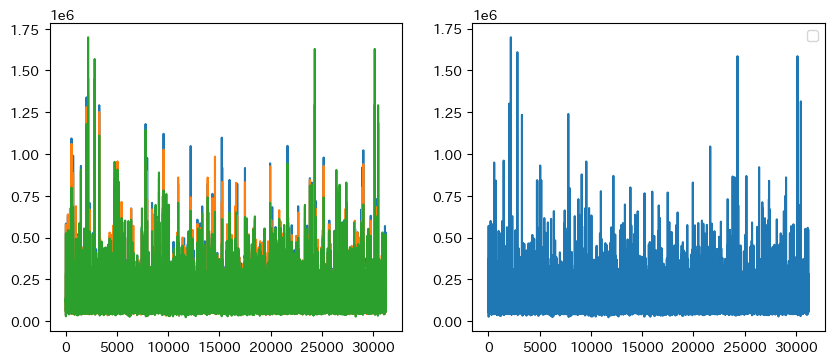

In [32]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
# ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ブレンドのモデルがLGBMの場合

In [3]:
# 個別のモデルの予測値たち。
valid_pred_LGBM = model_LGBM.predict(X_valid)
# valid_pred_DART = model_DART.predict(X_valid)
valid_pred_GOSS = model_GOSS.predict(X_valid)
valid_pred_XGB = xgb_reg.predict(X_valid)

# ブレンドの特徴量になるものをまとめる。
# stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB))
stack_valid_pred = np.column_stack((valid_pred_LGBM,valid_pred_GOSS,valid_pred_XGB))

# ブレンドの作成。
blend_model = lgb.LGBMRegressor()
# ブレンドの特徴量として作ったデータと元データのy_validでブレンドを学習させる。
blend_model.fit(stack_valid_pred, y_valid)

# ここのモデルによるテストデータからの予測値
pred_LGBM = model_LGBM.predict(X_test)
# pred_DART = model_DART.predict(X_test)
pred_GOSS = model_GOSS.predict(X_test)
pred_XGB = xgb_reg.predict(X_test)

pred_LGBM = pd.DataFrame(pred_LGBM)
# pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)

#　ブレンドモデルのテストデータを作成
# stack_test_pred = np.column_stack((pred_LGBM, pred_DART, pred_GOSS, pred_XGB))
stack_test_pred = np.column_stack((pred_LGBM, pred_GOSS, pred_XGB))
print(stack_test_pred)

blend_pred = blend_model.predict(stack_test_pred)
blend_pred = pd.DataFrame(blend_pred)

NameError: name 'model_LGBM' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


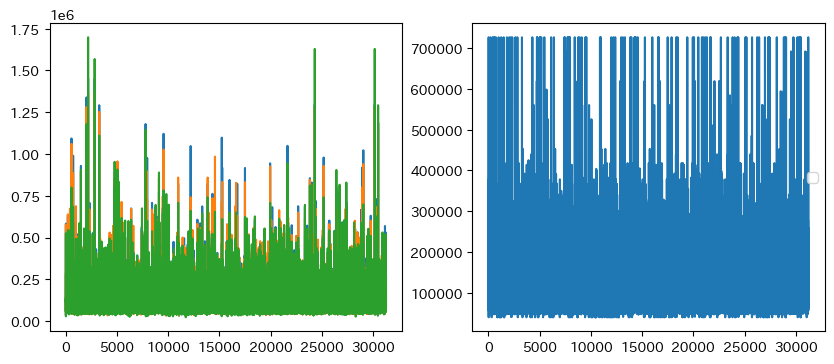

In [27]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_LGBM, label='LGBM')
# ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')

ax2.plot(range(len(blend_pred)), blend_pred)

plt.legend(loc='best')
plt.show()

ファイル出力

In [36]:
df = pd.read_csv('test.csv')
id = df['id']
y_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('blend_result.csv',index=False)

### GBDTとDARTとGOSSとXGBoostでstackingアンサンブルを行う。(交差検証ver)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']

X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]]], axis=1)
y_train = rent
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D","S"]]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D','S']

In [34]:
n_split = 5
cv = KFold(n_splits=n_split, shuffle=True, random_state=0)
valid_GBDT = np.zeros(X_train.shape[0])
test_GBDT = np.zeros((X_test.shape[0], n_split))
valid_DART = np.zeros(X_train.shape[0])
test_DART = np.zeros((X_test.shape[0], n_split))
valid_GOSS = np.zeros(X_train.shape[0])
test_GOSS = np.zeros((X_test.shape[0], n_split))
valid_XGB = np.zeros(X_train.shape[0])
test_XGB = np.zeros((X_test.shape[0], n_split))
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]
    sX_tr, sX_val, sy_tr, sy_val = train_test_split(X_tr, y_tr, test_size=0.1, random_state=0)

    ####GBDT###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GBDT = {
        'objective':'regression',
        'boosting_type':'gbdt',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.903886846508796e-05,
        'max_bin': 288,
        'num_leaves':116
    }
    model_GBDT = lgb.train(
                        params_GBDT,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GBDT[valid_index] = model_GBDT.predict(X_val)
    test_GBDT[:,fold_id] = model_GBDT.predict(X_test)

    ###DART###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_DART = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.7630799986965487e-05,
        'max_bin': 392,
        'num_leaves': 119
    }
    model_DART = lgb.train(
                        params_DART,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=2000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_DART[valid_index] = model_DART.predict(X_val)
    test_DART[:,fold_id] = model_DART.predict(X_test)

    ###GOSS###
    lgb_train = lgb.Dataset(sX_tr, sy_tr)
    lgb_eval = lgb.Dataset(sX_val, sy_val, reference=lgb_train)
    params_GOSS = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 5.059803874660429e-06,
        'max_bin': 575,
        'num_leaves': 55
    }
    model_GOSS = lgb.train(
                        params_GOSS,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists
                        )
    valid_GOSS[valid_index] = model_GOSS.predict(X_val)
    test_GOSS[:,fold_id] = model_GOSS.predict(X_test)

    ###XGBoost###
    xgb_reg = xgboost.XGBRegressor(
        #目的関数の指定 初期値も二乗誤差です
                        objective='reg:linear',
                        #学習のラウンド数 early_stoppingを利用するので多めに指定
                        n_estimators=50000,
                        #boosterに何を用いるか 初期値もgbtreeです
                        booster='gbtree',
                        learning_rate=0.05,
                        max_depth=7,
                        random_state=0,
                        reg_alfa=6.8594164113286965e-06,
                        sub_sample=0.16056047423047484,
                        colsample_bytree=0.6987351856651322,
                        min_child_weight=1.1103525577197584
    )
    xgb_reg.fit(sX_tr, sy_tr, eval_set=[(sX_val, sy_val)], early_stopping_rounds=10)
    valid_XGB[valid_index] = xgb_reg.predict(X_val)
    test_XGB[:,fold_id] = xgb_reg.predict(X_test)

valid_pred_GBDT = pd.DataFrame(valid_GBDT)
valid_pred_DART = pd.DataFrame(valid_DART)
valid_pred_GOSS = pd.DataFrame(valid_GOSS)
valid_pred_XGB = pd.DataFrame(valid_XGB)
stack_valid_pred = pd.concat([valid_pred_GBDT,valid_pred_DART,valid_pred_GOSS,valid_pred_XGB],axis=1)

#ブレンドモデルの学習データとなる、各個別のモデルの検証データの予測値をまとめる
train_blend = stack_valid_pred
train_blend.columns = ['GBDTの予測', 'DARTの予測', 'GOSSの予測', 'XGBの予測']
train_blend.to_csv('../data/handmade_data/train_blend.csv',index=False)

# ブレンドの作成。
# xgbc2_params = {
#     'n_eetimators': 100, 
#     'max_depth': 5, 
#     'random_state': 42, 
# }
# xgb2 = xgboost.XGBRegressor(**xgbc2_params)
# xgb2.fit(blend_train, y_train)
# blend_model = lgb.LGBMRegressor()
blend_model = RandomForestRegressor()
blend_model.fit(train_blend, y_train)

pred_GBDT = test_GBDT.mean(axis=1)
pred_DART = test_DART.mean(axis=1)
pred_GOSS = test_GOSS.mean(axis=1)
pred_XGB = test_XGB.mean(axis=1)

pred_GBDT = pd.DataFrame(pred_GBDT)
pred_DART = pd.DataFrame(pred_DART)
pred_GOSS = pd.DataFrame(pred_GOSS)
pred_XGB = pd.DataFrame(pred_XGB)


#　ブレンドモデルのテストデータを作成
test_blend = pd.concat([pred_GBDT, pred_DART, pred_GOSS, pred_XGB], axis=1)
test_blend.to_csv('../data/test_data/test_blend.csv',index=False)
print("ブレンドモデルに入れるテストデータ",test_blend)

#ブレンドモデルによる最終の予測値
blend_pred = blend_model.predict(test_blend)
blend_pred = pd.DataFrame(blend_pred)

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118553.622032
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49099.8	valid_1's rmse: 46016.6
[20]	training's rmse: 34810.3	valid_1's rmse: 32247
[30]	training's rmse: 26483.1	valid_1's rmse: 24860.7
[40]	training's rmse: 21210.6	valid_1's rmse: 20846.5
[50]	training's rmse: 17943.2	valid_1's rmse: 18789.1
[60]	training's rmse: 15931.7	valid_1's rmse: 17750.8
[70]	training's rmse: 14585.7	valid_1's rmse: 17279.7
[80]	training's rmse: 13578.6	valid_1's rmse: 17170.9
[90]	training's rmse: 12807.6	valid_1's rmse: 17017.8
[100]	training's rmse: 12148.9	valid_1's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[30]	training's rmse: 30337.4	valid_1's rmse: 27505.3
[40]	training's rmse: 27005.5	valid_1's rmse: 24727.1
[50]	training's rmse: 30574.1	valid_1's rmse: 28394.2
[60]	training's rmse: 34884.2	valid_1's rmse: 33203.8
[70]	training's rmse: 36808.2	valid_1's rmse: 35399.6
[80]	training's rmse: 31784	valid_1's rmse: 30533.7
[90]	training's rmse: 31685.2	valid_1's rmse: 30257.6
[100]	training's rmse: 33763.1	valid_1's rmse: 32597.1
[110]	training's rmse: 40650.4	valid_1's rmse: 39299.4
[120]	training's rmse: 32407.9	valid_1's rmse: 31474.9
[130]	training's rmse: 29152	valid_1's rmse: 28415.2
[140]	training's rmse: 32039.8	valid_1's rmse: 31489.7
[150]	training's rmse: 30436.7	valid_1's rmse: 29905.1
[160]	training's rmse: 35178.1	valid_1's rmse: 34437.3
[170]	training's rmse: 28541.1	valid_1's rmse: 28301.7
[180]	training's rmse: 27317.5	valid_1's rmse: 27266.7
[190]	training's rmse: 23450.9	valid_1's rmse: 23811.9
[200]	training's rmse: 22436.9	valid_1's rmse: 23025
[210]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:60190.44192
[18]	validation_0-rmse:57476.93859
[19]	validation_0-rmse:54976.47525
[20]	validation_0-rmse:52866.05266
[21]	validation_0-rmse:50760.30343
[22]	validation_0-rmse:48914.79746
[23]	validation_0-rmse:47029.82358
[24]	validation_0-rmse:45306.38444
[25]	validation_0-rmse:43614.08523
[26]	validation_0-rmse:41900.85233
[27]	validation_0-rmse:40399.95502
[28]	validation_0-rmse:38930.17064
[29]	validation_0-rmse:37725.49208
[30]	validation_0-rmse:36438.65294
[31]	validation_0-rmse:35296.68143
[32]	validation_0-rmse:34307.69584
[33]	validation_0-rmse:33226.53217
[34]	validation_0-rmse:32282.62643
[35]	validation_0-rmse:31351.69789
[36]	validation_0-rmse:30539.51549
[37]	validation_0-rmse:29629.75270
[38]	validation_0-rmse:28885.54927
[39]	validation_0-rmse:28212.73710
[40]	validation_0-rmse:27589.35318
[41]	validation_0-rmse:27034.52383
[42]	validation_0-rmse:26516.50870
[43]	validation_0-rmse:25985.51393
[44]	validation_0-rmse:25417.22681
[45]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118599.114661
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49766.8	valid_1's rmse: 46564.4
[20]	training's rmse: 35966.8	valid_1's rmse: 32860.1
[30]	training's rmse: 28142.7	valid_1's rmse: 25394.2
[40]	training's rmse: 23650.9	valid_1's rmse: 21556.4
[50]	training's rmse: 20809.6	valid_1's rmse: 19406.9
[60]	training's rmse: 19063.7	valid_1's rmse: 18295.2
[70]	training's rmse: 17835.7	valid_1's rmse: 17521.2
[80]	training's rmse: 16858.7	valid_1's rmse: 17116.5
[90]	training's rmse: 16079.7	valid_1's rmse: 16778.8
[100]	training's rmse: 15420.1	valid_1'

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 28826.8	valid_1's rmse: 26817.6
[50]	training's rmse: 32161.4	valid_1's rmse: 30232.8
[60]	training's rmse: 36270.9	valid_1's rmse: 34679.9
[70]	training's rmse: 38107.4	valid_1's rmse: 36579.6
[80]	training's rmse: 33288.3	valid_1's rmse: 31587.6
[90]	training's rmse: 33189.5	valid_1's rmse: 31413.5
[100]	training's rmse: 35156.9	valid_1's rmse: 33508.7
[110]	training's rmse: 41775.4	valid_1's rmse: 40144.7
[120]	training's rmse: 33914.6	valid_1's rmse: 32441.7
[130]	training's rmse: 30935.8	valid_1's rmse: 29550.8
[140]	training's rmse: 33616.7	valid_1's rmse: 32472.4
[150]	training's rmse: 32129.1	valid_1's rmse: 30967
[160]	training's rmse: 36640.9	valid_1's rmse: 35384
[170]	training's rmse: 30270.9	valid_1's rmse: 29257.7
[180]	training's rmse: 29191.5	valid_1's rmse: 28293.3
[190]	training's rmse: 25437.2	valid_1's rmse: 24787.2
[200]	training's rmse: 24497.6	valid_1's rmse: 24050.8
[210]	training's rmse: 26506.7	valid_1's rmse: 26003.2
[220]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:63952.59529
[17]	validation_0-rmse:61256.37570
[18]	validation_0-rmse:58623.96253
[19]	validation_0-rmse:56167.69802
[20]	validation_0-rmse:54151.38166
[21]	validation_0-rmse:52017.73026
[22]	validation_0-rmse:50225.84732
[23]	validation_0-rmse:48391.56172
[24]	validation_0-rmse:46712.37165
[25]	validation_0-rmse:44995.16630
[26]	validation_0-rmse:43259.74513
[27]	validation_0-rmse:41786.07781
[28]	validation_0-rmse:40362.70512
[29]	validation_0-rmse:39205.87833
[30]	validation_0-rmse:37953.18856
[31]	validation_0-rmse:36893.24564
[32]	validation_0-rmse:35973.05796
[33]	validation_0-rmse:34899.65915
[34]	validation_0-rmse:33963.06554
[35]	validation_0-rmse:33128.01109
[36]	validation_0-rmse:32368.25132
[37]	validation_0-rmse:31535.77800
[38]	validation_0-rmse:30854.89499
[39]	validation_0-rmse:30230.26882
[40]	validation_0-rmse:29716.44761
[41]	validation_0-rmse:29193.20580
[42]	validation_0-rmse:28704.73986
[43]	validation_0-rmse:28249.03757
[44]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2159
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118177.504678
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 50100.2	valid_1's rmse: 41991.3
[20]	training's rmse: 36224.7	valid_1's rmse: 29339.7
[30]	training's rmse: 28145.4	valid_1's rmse: 22513.6
[40]	training's rmse: 23335	valid_1's rmse: 18711.3
[50]	training's rmse: 20456.9	valid_1's rmse: 16635.3
[60]	training's rmse: 18661	valid_1's rmse: 15439.2
[70]	training's rmse: 17479.5	valid_1's rmse: 14761.1
[80]	training's rmse: 16616.1	valid_1's rmse: 14268.5
[90]	training's rmse: 15884.6	valid_1's rmse: 13868.1
[100]	training's rmse: 15336.5	valid_1's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[30]	training's rmse: 32226.6	valid_1's rmse: 26191.8
[40]	training's rmse: 29386.9	valid_1's rmse: 23832.6
[50]	training's rmse: 32667.5	valid_1's rmse: 27348.3
[60]	training's rmse: 36663.3	valid_1's rmse: 32160.5
[70]	training's rmse: 38398.3	valid_1's rmse: 34371.8
[80]	training's rmse: 33628.2	valid_1's rmse: 29380
[90]	training's rmse: 33531.3	valid_1's rmse: 29005.6
[100]	training's rmse: 35417.8	valid_1's rmse: 31365.4
[110]	training's rmse: 41974.9	valid_1's rmse: 38055.5
[120]	training's rmse: 34156.2	valid_1's rmse: 30299.6
[130]	training's rmse: 31198.1	valid_1's rmse: 27288.9
[140]	training's rmse: 33809.7	valid_1's rmse: 30401
[150]	training's rmse: 32343.7	valid_1's rmse: 28795.6
[160]	training's rmse: 36818.5	valid_1's rmse: 33362
[170]	training's rmse: 30461.9	valid_1's rmse: 27181.9
[180]	training's rmse: 29314.9	valid_1's rmse: 26165.7
[190]	training's rmse: 25543.3	valid_1's rmse: 22688.1
[200]	training's rmse: 24653	valid_1's rmse: 21776
[210]	training's rmse: 2662

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:65533.52454
[15]	validation_0-rmse:62767.99374
[16]	validation_0-rmse:60019.86424
[17]	validation_0-rmse:57436.43768
[18]	validation_0-rmse:54968.83537
[19]	validation_0-rmse:52637.66420
[20]	validation_0-rmse:50461.88613
[21]	validation_0-rmse:48504.46605
[22]	validation_0-rmse:46673.48492
[23]	validation_0-rmse:44908.30913
[24]	validation_0-rmse:43244.93408
[25]	validation_0-rmse:41615.70629
[26]	validation_0-rmse:40038.78455
[27]	validation_0-rmse:38586.19464
[28]	validation_0-rmse:37216.79948
[29]	validation_0-rmse:35973.02641
[30]	validation_0-rmse:34788.36475
[31]	validation_0-rmse:33725.61412
[32]	validation_0-rmse:32727.28610
[33]	validation_0-rmse:31741.98795
[34]	validation_0-rmse:30886.09479
[35]	validation_0-rmse:30083.92513
[36]	validation_0-rmse:29258.10161
[37]	validation_0-rmse:28477.52736
[38]	validation_0-rmse:27810.92285
[39]	validation_0-rmse:27156.24868
[40]	validation_0-rmse:26590.98605
[41]	validation_0-rmse:26070.89117
[42]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 50187.8	valid_1's rmse: 44195.3
[20]	training's rmse: 36127.2	valid_1's rmse: 30384.9
[30]	training's rmse: 28064.7	valid_1's rmse: 22859
[40]	training's rmse: 23261.6	valid_1's rmse: 18937.9
[50]	training's rmse: 20224.7	valid_1's rmse: 16395.4
[60]	training's rmse: 18472.7	valid_1's rmse: 15014.3
[70]	training's rmse: 17282.7	valid_1's rmse: 14220.6
[80]	training's rmse: 16475	valid_1's rmse: 13667.3
[90]	training's rmse: 15791	valid_1's rmse: 13341.5
[100]	training's rmse: 15220.2	valid_1's rmse: 13126.7
[110]	training's rmse: 14728	valid_1's rmse: 13006
[120]	training's rmse: 14256.1	valid_1's rmse: 12987
[130]	training's rmse: 13843.4	valid_1's rmse: 12895
[140]	training's rmse: 13488.6	valid_1's rmse: 12839.3
[150]	training's rmse: 13142.7	valid_1's rmse: 12787.3
[160]	training's rmse: 12849.1	valid_1's rmse: 12758.2
[170]	training's rmse: 12554.1	valid_1's rmse: 12727.4
[180]	training's rmse: 1229

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 28852.2	valid_1's rmse: 24203.8
[50]	training's rmse: 32231.1	valid_1's rmse: 27875.4
[60]	training's rmse: 36280.5	valid_1's rmse: 32626.8
[70]	training's rmse: 38069.5	valid_1's rmse: 34675.1
[80]	training's rmse: 33271	valid_1's rmse: 29661
[90]	training's rmse: 33190.5	valid_1's rmse: 29378.1
[100]	training's rmse: 35138.5	valid_1's rmse: 31632.3
[110]	training's rmse: 41782	valid_1's rmse: 38486.9
[120]	training's rmse: 33898.4	valid_1's rmse: 30477.4
[130]	training's rmse: 30914.9	valid_1's rmse: 27385.1
[140]	training's rmse: 33558.1	valid_1's rmse: 30575.2
[150]	training's rmse: 32065.6	valid_1's rmse: 28981.5
[160]	training's rmse: 36591.8	valid_1's rmse: 33590.1
[170]	training's rmse: 30134.5	valid_1's rmse: 27223.3
[180]	training's rmse: 29089.9	valid_1's rmse: 26233.3
[190]	training's rmse: 25289.9	valid_1's rmse: 22681.2
[200]	training's rmse: 24393.6	valid_1's rmse: 21798.5
[210]	training's rmse: 26447.8	valid_1's rmse: 23851.3
[220]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:64881.64095
[16]	validation_0-rmse:62001.32070
[17]	validation_0-rmse:59317.79855
[18]	validation_0-rmse:56723.10365
[19]	validation_0-rmse:54279.19080
[20]	validation_0-rmse:52190.86986
[21]	validation_0-rmse:50106.52597
[22]	validation_0-rmse:48263.40485
[23]	validation_0-rmse:46439.14868
[24]	validation_0-rmse:44742.08486
[25]	validation_0-rmse:42971.88931
[26]	validation_0-rmse:41314.73266
[27]	validation_0-rmse:39882.31996
[28]	validation_0-rmse:38442.17536
[29]	validation_0-rmse:37229.34957
[30]	validation_0-rmse:35891.95849
[31]	validation_0-rmse:34722.08406
[32]	validation_0-rmse:33736.61103
[33]	validation_0-rmse:32708.27821
[34]	validation_0-rmse:31776.80222
[35]	validation_0-rmse:30901.88464
[36]	validation_0-rmse:30074.01910
[37]	validation_0-rmse:29169.11262
[38]	validation_0-rmse:28475.35493
[39]	validation_0-rmse:27812.76373
[40]	validation_0-rmse:27244.34043
[41]	validation_0-rmse:26631.74677
[42]	validation_0-rmse:26096.69156
[43]	validation_0-rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['D', 'L', 'S', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argumen

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 22658, number of used features: 14
[LightGBM] [Info] Start training from score 118196.819490
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49015.2	valid_1's rmse: 49920.3
[20]	training's rmse: 35638.3	valid_1's rmse: 35636.3
[30]	training's rmse: 28158.6	valid_1's rmse: 27788.9
[40]	training's rmse: 23687.1	valid_1's rmse: 23193.4
[50]	training's rmse: 20846.4	valid_1's rmse: 20545.5
[60]	training's rmse: 19178.6	valid_1's rmse: 18950.1
[70]	training's rmse: 17963.8	valid_1's rmse: 17870.2
[80]	training's rmse: 17015.7	valid_1's rmse: 17216.2
[90]	training's rmse: 16308.9	valid_1's rmse: 16695.6
[100]	training's rmse: 15752.9	valid_1'

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/callback.py:223: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[40]	training's rmse: 29112.9	valid_1's rmse: 29970.9
[50]	training's rmse: 32367.8	valid_1's rmse: 33619.2
[60]	training's rmse: 36550.8	valid_1's rmse: 37593.5
[70]	training's rmse: 38393.5	valid_1's rmse: 39370.5
[80]	training's rmse: 33595.2	valid_1's rmse: 34535.8
[90]	training's rmse: 33446	valid_1's rmse: 34548.9
[100]	training's rmse: 35406	valid_1's rmse: 36318.9
[110]	training's rmse: 41917	valid_1's rmse: 42965
[120]	training's rmse: 34103.8	valid_1's rmse: 35068.2
[130]	training's rmse: 31193.9	valid_1's rmse: 31990.6
[140]	training's rmse: 33847.8	valid_1's rmse: 34748.1
[150]	training's rmse: 32350.4	valid_1's rmse: 33248.2
[160]	training's rmse: 36769.6	valid_1's rmse: 37819.3
[170]	training's rmse: 30535.8	valid_1's rmse: 31564.4
[180]	training's rmse: 29469.9	valid_1's rmse: 30537.8
[190]	training's rmse: 25726.8	valid_1's rmse: 26870.8
[200]	training's rmse: 24765.4	valid_1's rmse: 25992.5
[210]	training's rmse: 26733.4	valid_1's rmse: 27996.6
[220]	training's rmse: 2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:73864.62482
[15]	validation_0-rmse:71308.52577
[16]	validation_0-rmse:68394.48803
[17]	validation_0-rmse:65685.12045
[18]	validation_0-rmse:63041.51449
[19]	validation_0-rmse:60610.00653
[20]	validation_0-rmse:58588.51426
[21]	validation_0-rmse:56536.68310
[22]	validation_0-rmse:54842.83947
[23]	validation_0-rmse:53026.75791
[24]	validation_0-rmse:51378.31120
[25]	validation_0-rmse:49668.52122
[26]	validation_0-rmse:47934.87259
[27]	validation_0-rmse:46579.29274
[28]	validation_0-rmse:45080.93383
[29]	validation_0-rmse:43978.82727
[30]	validation_0-rmse:42690.55286
[31]	validation_0-rmse:41588.98767
[32]	validation_0-rmse:40687.62369
[33]	validation_0-rmse:39627.39646
[34]	validation_0-rmse:38737.05842
[35]	validation_0-rmse:37878.16117
[36]	validation_0-rmse:37131.35990
[37]	validation_0-rmse:36069.29038
[38]	validation_0-rmse:35388.99272
[39]	validation_0-rmse:34760.49252
[40]	validation_0-rmse:34110.85679
[41]	validation_0-rmse:33511.75094
[42]	validation_0-rm

/var/folders/qh/20ftf7rn5_58_rk3l25kt1nr0000gn/T/ipykernel_1125/4145997144.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  blend_model.fit(train_blend, y_train)


ブレンドモデルに入れるテストデータ                    0              0              0              0
0      133139.731977  131367.713571  132560.516818  131017.467188
1      120583.798364  123902.303849  119427.094680  120044.601562
2       75580.510965   76605.701732   78432.135053   79186.925000
3       61190.975835   62765.949776   60806.938343   61440.953125
4      111825.508998  104839.692107  114694.656606  116360.884375
...              ...            ...            ...            ...
31257  108627.533935  110996.982968  107485.591356  108061.609375
31258  102256.320035   99859.387028  100803.596448  103125.490625
31259  177009.057877  172521.345798  173472.341549  174879.071875
31260  254044.944693  265603.108607  247607.792143  275206.643750
31261   79370.084378   80523.792195   81858.822237   80469.709375

[31262 rows x 4 columns]


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
blend_pred = pd.DataFrame(blend_pred)
result = pd.concat([id, blend_pred],axis=1)
result.to_csv('../data/result_data/blend_cv_result.csv',index=False)

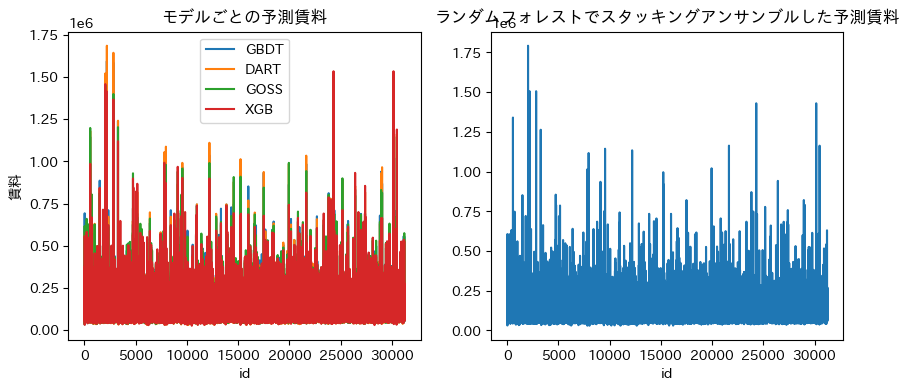

In [36]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(range(len(blend_pred)), pred_GBDT, label='GBDT')
ax.plot(range(len(blend_pred)), pred_DART, label='DART')
ax.plot(range(len(blend_pred)), pred_GOSS, label='GOSS')
ax.plot(range(len(blend_pred)), pred_XGB, label='XGB')
ax.set_xlabel("id")
ax.set_ylabel('賃料')
ax.set_title('モデルごとの予測賃料')

ax2.plot(range(len(blend_pred)), blend_pred)
ax2.set_xlabel('id')
ax2.set_title('ランダムフォレストでスタッキングアンサンブルした予測賃料')

ax.legend(loc='best')
plt.show()